# Ridge Regression with gradient descent

In [1]:
import numpy as np
np.random.seed(13)

class GradientDescent:
    def __init__(self, X, y, params, _lambda=1.0, alpha=0.1, precision = 0.0001, max_iterations=2000):
        self._X = np.ndarray.copy(X).astype('float64')
        self._y = np.ndarray.copy(y).astype('float64')
        self._lambda = _lambda
        self._alpha = alpha
        self._params = params
        self._precision = precision
        self._max_iterations = max_iterations
        self._perform()

    def _least_squere_error(self, X, y, params):
        shape = X.shape[0]
        return (1. / (2. * shape)) * (np.sum((np.dot(X, params) - y) ** 2.) 
                                                   + self._lambda * np.dot(params.T, params))
    def _perform(self):
        iteration = 0
        last = np.Infinity
        precision_satisfied = False
        shape = X.shape[0]
        while iteration < self._max_iterations and not precision_satisfied:
                error = self._least_squere_error(self._X, self._y, self._params)
                self._params = self._params - (self._alpha / shape) * \
                    (np.dot(self._X.T, (self._X.dot(self._params) - self._y[:, np.newaxis])) + self._lambda * self._params)
                if abs(error - last) < self._precision:
                    precision_satisfied = True
                iteration += 1
                
    def get_params(self):
        return self._params
        

In [2]:
from sklearn.base import BaseEstimator

class RidgeRegression(BaseEstimator):
    def __init__(self, _lambda=1.0, alpha=0.1, verbose=False):
        self._lambda = _lambda
        self._alpha = alpha
        self.verbose=verbose
        
    def fit(self, X, y):
        _X = np.ndarray.copy(X).astype('float64')
        _y = np.ndarray.copy(y).astype('float64')
        params = np.zeros((_X.shape[1] + 1, 1))
        self.y_mean = _y.mean(axis=0)
        _y -= self.y_mean
        self.X_mean = np.mean(_X, axis=0)
        self.X_std = np.std(_X, axis=0)
        _X -= self.X_mean
        self.X_std[self.X_std == 0] = 1
        _X /= self.X_std
        _X = np.hstack((np.ones(_X.shape[0])[np.newaxis].T, _X))
        gd = GradientDescent(_X,_y, params,_lambda=self._lambda)
        self.params = gd.get_params()

    def predict(self, X):
        _X = np.ndarray.copy(X).astype('float64')
        _X -= self.X_mean
        _X /= self.X_std
        _X = np.hstack((np.ones(_X.shape[0])[np.newaxis].T, _X))

        return _X.dot(self.params) + self.y_mean

    def score(self, X, y, sample_weight=None):
        predicted_values = self.predict(X)
        predicted_correctly = 0
        for predicted, real in zip(predicted_values, y):
            if abs(real - predicted) / real < 0.15:
                predicted_correctly += 1
        return predicted_correctly / len(predicted_values)
    

### Dataset
For given excample will be used dataset with parameters of cars. Parameter to predict will be horsepower having other parameters of car (like price, height, wheel-base, engine-size ect.)


In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd

dataset = pd.read_csv('http://cs.if.uj.edu.pl/piotrek/ML2019/datasets/dataset_2.txt')
X = dataset[['highway-mpg', 'symboling', 'normalized-losses','wheel-base', 'length', 'width', 
                                                        'height', 'curb-weight', 'engine-size',]]
      
y = dataset['horsepower']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values


## Optimize the choice of lambda

In [4]:
from sklearn.metrics import r2_score
from sklearn import svm
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['figure.figsize']=12,10
import seaborn as sns


def get_scores(lambdas):
    r_squared_scores = []
    for _lambda in lambdas:
        rr = RidgeRegression(_lambda=_lambda)
        rr.fit(X_train, y_train)
        predicted = rr.predict(X_test)
        predicted = [x[0] for x in predicted]
        rss = r2_score(predicted, y_test)
        r_squared_scores.append(rss)
       
    return r_squared_scores
        
    
def plot_r_squere_scores(lambdas):
    r_squared_scores = get_scores(lambdas)
    lambda_min = lambdas[0]
    lambda_max = lambdas[len(lambdas)-1]
    plt.figure(figsize=(18, 8))
    plt.plot(lambdas, r_squared_scores, 'bo-', label=r'$R^2$ score', color="darkblue", alpha=0.6, linewidth=3)
    plt.xlabel('Lamda value'); plt.ylabel(r'$R^2$')
    plt.xlim(lambda_min, lambda_max)
    plt.title(r'Evaluate ridge regression $R^2$ with different lamdas')
    plt.legend(loc='best')
    plt.grid()
    


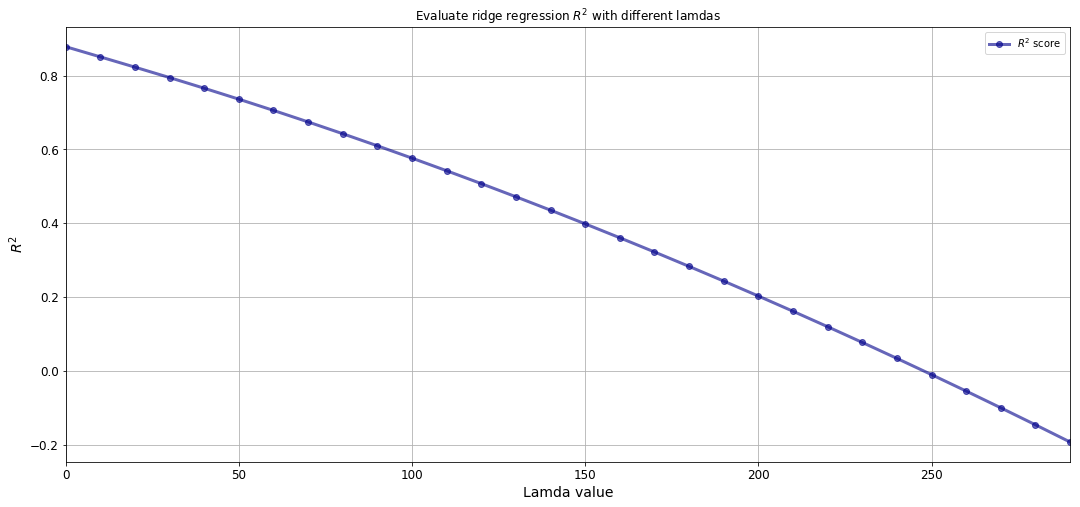

In [5]:
lambdas = np.arange(0, 300, 10)
plot_r_squere_scores(lambdas)

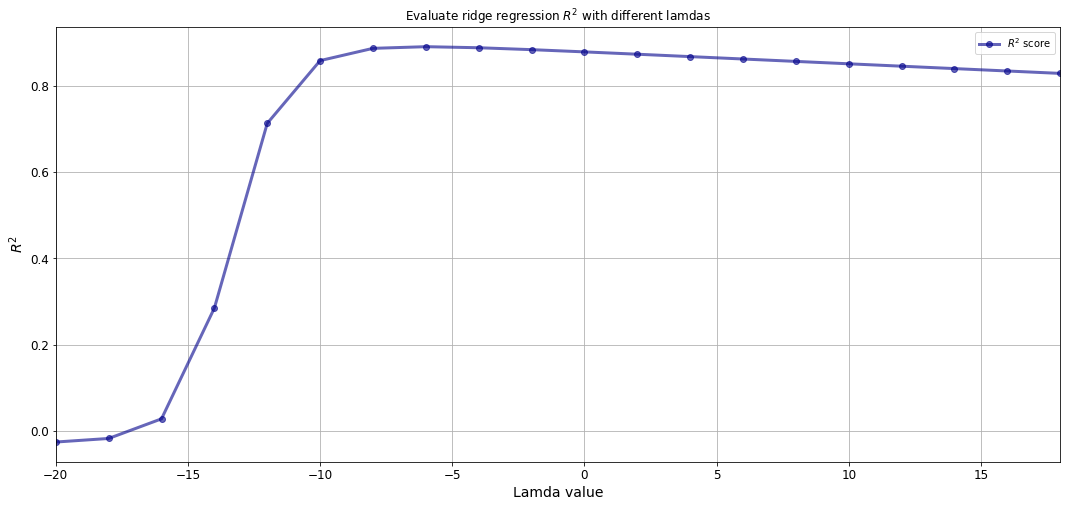

In [6]:
lambdas = np.arange(-20, 20, 2)
plot_r_squere_scores(lambdas)

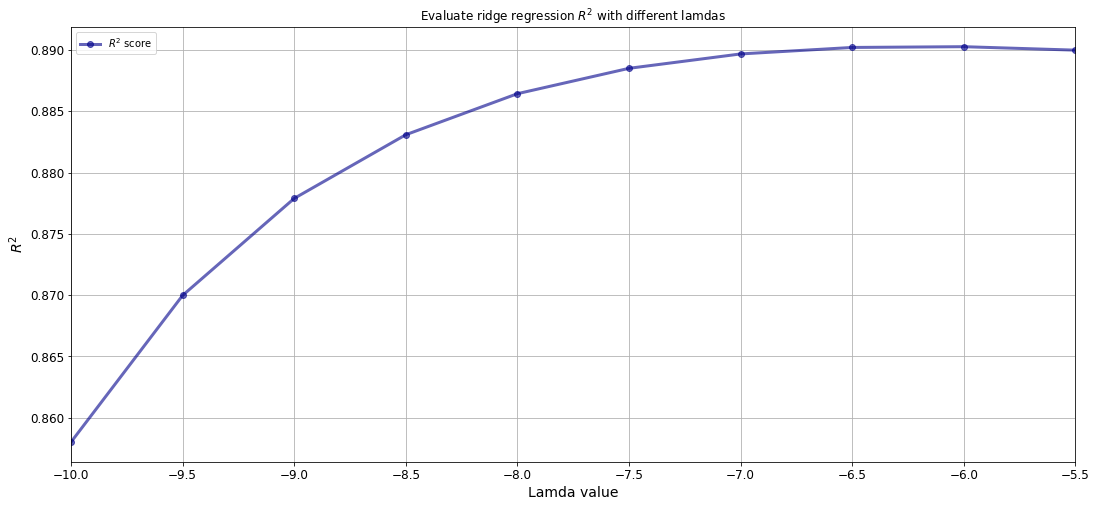

In [7]:
lambdas = np.arange(-10, -5, 0.5)
plot_r_squere_scores(lambdas)

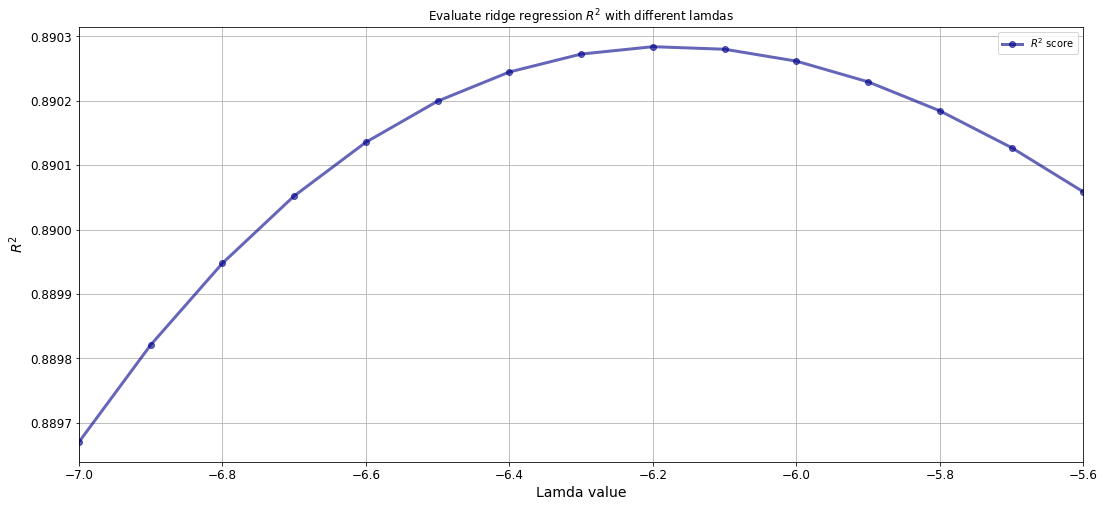

In [8]:
lambdas = np.arange(-7, -5.5, 0.1)
plot_r_squere_scores(lambdas)

In [9]:
from sklearn.model_selection import cross_val_score, cross_validate
lambdas = np.arange(-10, 10, 1)
for _lambda in lambdas : 
    rr = RidgeRegression(_lambda=_lambda)
    rr.fit(X_train, y_train)
    predicted = rr.predict(X_test)
    predicted = [x[0] for x in predicted]
    _X = np.ndarray.copy(X_test).astype('float64')
    _y = np.ndarray.copy(np.array(y_test)).astype('float64')

    cross_validation = cross_val_score(rr, _X, _y)
    print(" Lambda : {} cross validation : {} ".format(_lambda, cross_validation))


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


 Lambda : -10 cross validation : [0. 0. 0.] 
 Lambda : -9 cross validation : [0. 0. 0.] 
 Lambda : -8 cross validation : [0.         0.07142857 0.        ] 
 Lambda : -7 cross validation : [0.         0.07142857 0.        ] 
 Lambda : -6 cross validation : [0.         0.07142857 0.        ] 
 Lambda : -5 cross validation : [0.14285714 0.14285714 0.        ] 
 Lambda : -4 cross validation : [0.28571429 0.28571429 0.46153846] 
 Lambda : -3 cross validation : [0.28571429 0.35714286 0.61538462] 
 Lambda : -2 cross validation : [0.5        0.64285714 0.61538462] 
 Lambda : -1 cross validation : [0.64285714 1.         0.61538462] 
 Lambda : 0 cross validation : [0.78571429 1.         0.69230769] 
 Lambda : 1 cross validation : [0.71428571 0.92857143 0.69230769] 
 Lambda : 2 cross validation : [0.71428571 0.92857143 0.69230769] 
 Lambda : 3 cross validation : [0.71428571 0.85714286 0.76923077] 
 Lambda : 4 cross validation : [0.64285714 0.85714286 0.76923077] 
 Lambda : 5 cross validation : [

# Check the accuracy 
for best choosen lambda = 0

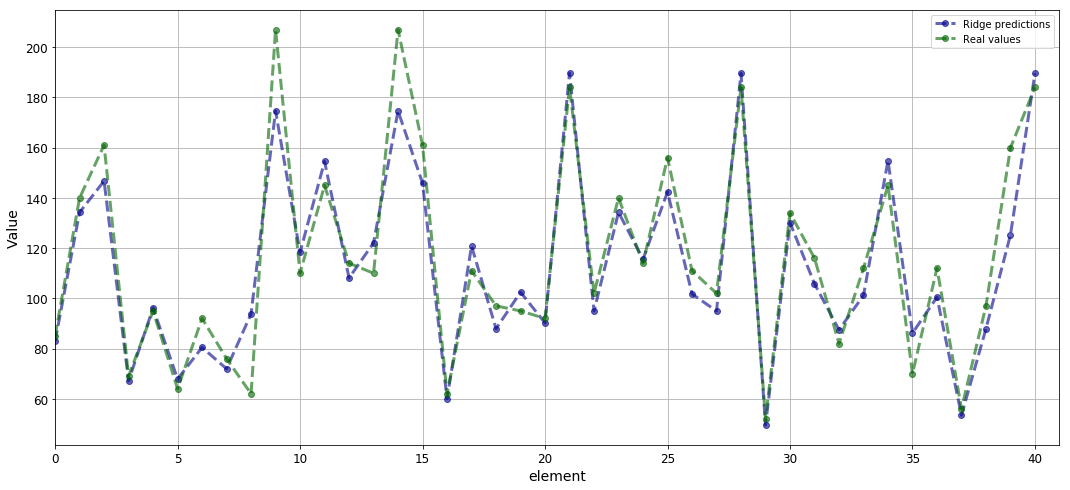

In [10]:
from sklearn.metrics import accuracy_score

rr = RidgeRegression(_lambda=0)
rr.fit(X_train, y_train)
predicted = rr.predict(X_test)
predicted_ridge = [x[0] for x in predicted]
x = [ i for i in range(len(predicted_ridge))]
plt.figure(figsize=(18, 8))
plt.plot(x, predicted_ridge, 'bo--', label=r'Ridge predictions', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(x, y_test, 'bo--', label=r'Real values', color="darkgreen", alpha=0.6, linewidth=3)
plt.xlabel('element'); plt.ylabel(r'Value')
plt.xlim(0,len(predicted_ridge))
plt.legend(loc='best')
plt.grid()


### Compare to Liniar Regression from sklearn

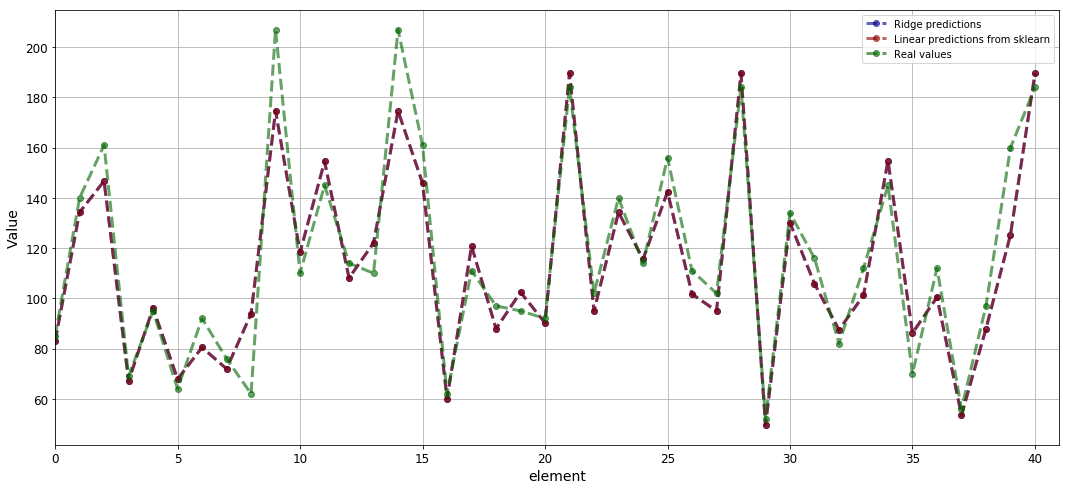

In [11]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
predicted_linear = model.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(x, predicted_ridge, 'bo--', label=r'Ridge predictions', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(x, predicted_linear, 'bo--', label=r'Linear predictions from sklearn', color="darkred", alpha=0.6, linewidth=3)
plt.plot(x, y_test, 'bo--', label=r'Real values', color="darkgreen", alpha=0.6, linewidth=3)
plt.xlabel('element'); plt.ylabel(r'Value')
plt.xlim(0,len(predicted_ridge))
plt.legend(loc='best')
plt.grid()



# Summary
After evaluation of r^2 and cross validation choosing the best lambda was not easy - if considered only r^2 score best result was when lambda was -6.2. On the other hand looking on cross validation results were the best when lambda was equal 0 and luckly at the same time r^2 score was only slightly worse and that was the finally choosen lambda. Taking into consideration plots comparing real values, values from Ridge and Linear Regression, my implementation of Ridge Regression passes the test - as it predicts the horsepower with the given dataset similarly to Linear Regression from Sklearn.